<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
#!pip install finta
SID = '6005.tw'
df = web.DataReader(SID,'yahoo',start="2000-01-01")
df = df.iloc[:,:5]

# 載入資料

In [2]:
print(df.shape)
df.head(3)

(3733, 5)


,High,Low,Open,Close,Volume
Date,,,,,
2000-01-04,8.83163,8.46555,8.46555,8.83163,16748344.0
2000-01-05,9.01467,8.60283,8.83163,8.83163,26107027.0
2000-01-06,9.42651,9.06043,9.24347,9.42651,48617859.0


In [3]:
df.tail(3)

,High,Low,Open,Close,Volume
Date,,,,,
2019-09-04,8.85,8.76,8.77,8.85,3300443.0
2019-09-05,8.90,8.85,8.87,8.86,2553843.0
2019-09-06,8.91,8.87,8.89,8.90,2939239.0


# Labeling(計算return)

In [0]:
#今天股價 = df['Close']
#昨天股價 = df['Close'].shift(1)
#df['return%'] = (今天股價/昨天股價-1)*100
#print(df['return%'].min(),df['return%'].max())
#sns.distplot(df['return%'].dropna())
#df.tail()

# Label triple_barrier

In [0]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close, 1.07, 0.97, 20)['triple_barrier_signal']
df = df.join(ret)

In [6]:
df.tail(20)

,High,Low,Open,Close,Volume,triple_barrier_signal
Date,,,,,,
2019-08-12,9.09,8.94,9.05,9.04,29780910.0,-1
2019-08-13,8.98,8.91,8.95,8.96,6204408.0,0
2019-08-14,9.00,8.95,8.97,8.98,1396213.0,0
2019-08-15,8.87,8.73,8.87,8.82,11860827.0,0
2019-08-16,8.90,8.79,8.82,8.90,1105242.0,0
2019-08-19,8.96,8.90,8.90,8.95,1011157.0,0
2019-08-20,8.99,8.89,8.95,8.90,1559788.0,0
2019-08-21,8.94,8.87,8.90,8.88,961558.0,0
2019-08-22,8.95,8.84,8.88,8.95,4047209.0,0


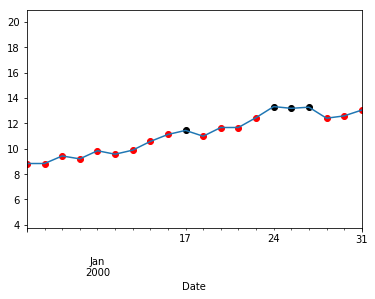

In [7]:
import matplotlib.pyplot as plt
buy = df[df['triple_barrier_signal']==1]['Close']
sell = df[df['triple_barrier_signal']==-1]['Close']
df['Close'][0:20].plot()
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')

# 建立ohlcv

In [0]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    3731.000000
mean       49.249225
std        17.475784
min         6.628164
25%        36.096164
50%        49.070554
75%        60.827154
max       100.000000
Name: RSI, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535


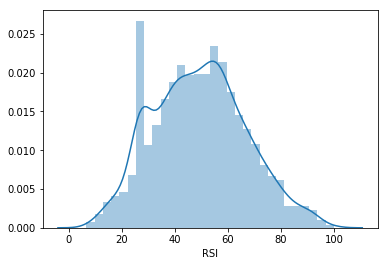

In [9]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    3528.000000
mean      -51.264391
std        30.587278
min      -100.000000
25%       -79.026795
50%       -50.808455
75%       -24.997491
max        -0.000000
Name: Williams %R, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075


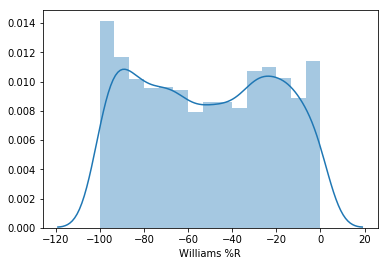

In [10]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    3693.000000
mean       10.427921
std         2.234280
min         5.818921
25%         9.116829
50%         9.791427
75%        11.622971
max        18.684341
Name: SMA, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512


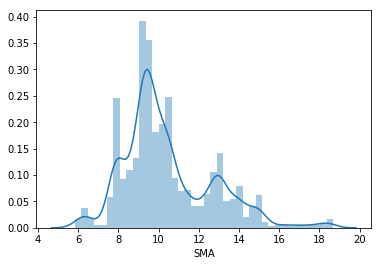

In [11]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    3733.000000
mean       10.426814
std         2.289545
min         5.192988
25%         9.088153
50%         9.771216
75%        11.641163
max        19.301278
Name: EMA, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348


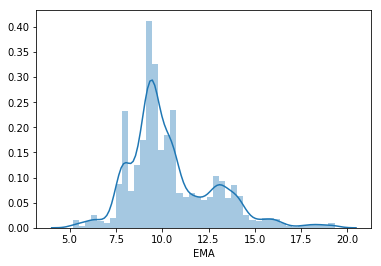

In [12]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

/usr/local/lib/python3.6/dist-packages/finta/finta.py:263: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  wma = close_.apply(linear(weights))


count    3725.000000
mean       10.429424
std         2.304348
min         4.983435
25%         9.075598
50%         9.779856
75%        11.655247
max        19.484255
Name: WMA, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778


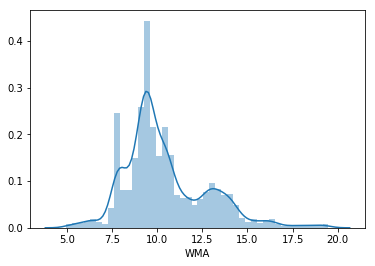

In [13]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

/usr/local/lib/python3.6/dist-packages/finta/finta.py:263: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  wma = close_.apply(linear(weights))
/usr/local/lib/python3.6/dist-packages/finta/finta.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ohlc['deltawma'] = 2 * wmaf - wmas


count    3730.000000
mean       10.427445
std         2.312638
min         4.694727
25%         9.057477
50%         9.766360
75%        11.612145
max        19.648570
Name: HMA, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825


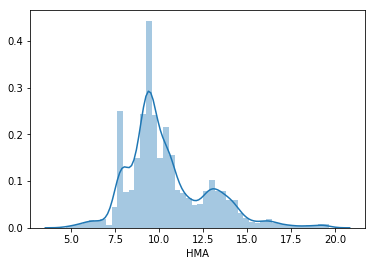

In [14]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    3733.000000
mean       10.426220
std         2.324845
min         4.540239
25%         9.047873
50%         9.755676
75%        11.578863
max        19.964232
Name: TEMA, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194


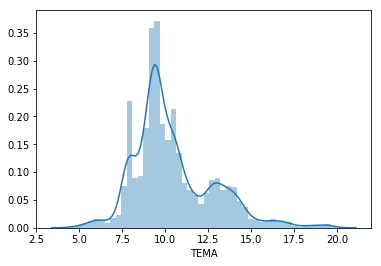

In [15]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    3732.000000
mean        1.477523
std        87.234470
min      -257.649608
25%       -67.017523
50%         0.000001
75%        68.442094
max       283.235277
Name: CCI, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708


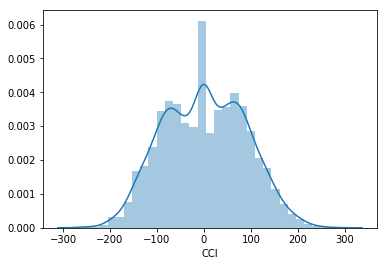

In [16]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    3527.000000
mean        0.977693
std        42.734722
min      -100.000000
25%       -29.785376
50%         0.000000
75%        31.999969
max       100.000000
Name: CMO, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814


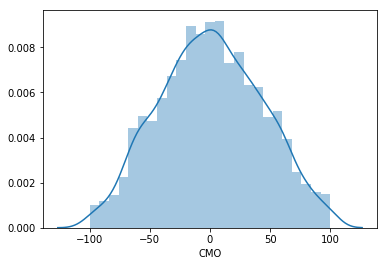

In [17]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    3733.000000
mean       -0.000195
std         0.083284
min        -0.462033
25%        -0.031662
50%         0.000688
75%         0.035466
max         0.342792
Name: MACD, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835


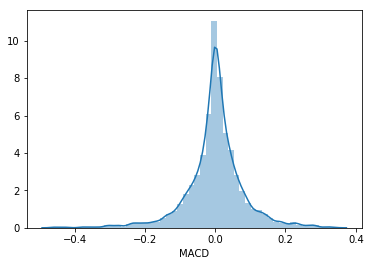

In [18]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    3733.000000
mean       -0.002094
std         0.757906
min        -3.725458
25%        -0.324288
50%         0.001610
75%         0.335442
max         5.171251
Name: PPO, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080,-0.092615
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255,-0.027776
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950,0.087080
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876,0.176765
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835,0.267190


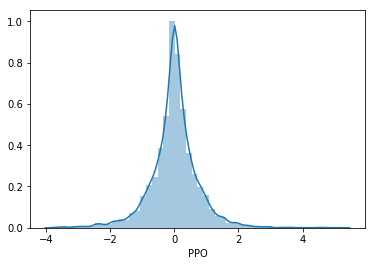

In [19]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    3721.000000
mean        0.261628
std         7.796611
min       -39.499950
25%        -2.843162
50%         0.000000
75%         3.200911
max        49.761002
Name: ROC, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080,-0.092615,-0.680266
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255,-0.027776,-1.460665
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950,0.087080,-1.117312
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876,0.176765,-0.449438
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835,0.267190,0.225220


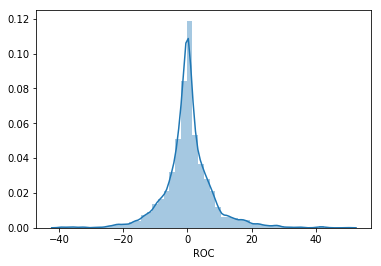

In [20]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    3.724000e+03
mean    -4.657735e+09
std      3.569555e+09
min     -1.417991e+10
25%     -4.871874e+09
50%     -4.775388e+09
75%     -4.732326e+09
max      5.764385e+08
Name: CFI, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080,-0.092615,-0.680266,-4.748498e+09
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255,-0.027776,-1.460665,-4.748601e+09
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950,0.087080,-1.117312,-4.748637e+09
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876,0.176765,-0.449438,-4.748662e+09
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835,0.267190,0.225220,-4.748661e+09


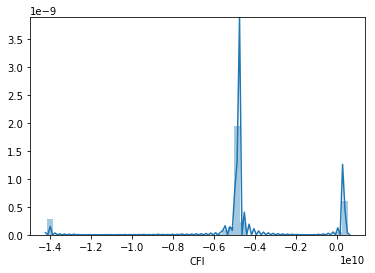

In [21]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

/usr/local/lib/python3.6/dist-packages/finta/finta.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ohlc["up_move"] = ohlc["high"].diff()
/usr/local/lib/python3.6/dist-packages/finta/finta.py:793: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ohlc["down_move"] = -ohlc["low"].diff()
/usr/local/lib/python3.6/dist-packages/finta/finta.py:809: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

count    3650.000000
mean        8.786800
std       165.977485
min      -109.955044
25%       -10.531133
50%         0.179257
75%        13.446914
max      8399.998571
Name: DMI, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080,-0.092615,-0.680266,-4.748498e+09,-20.968902
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255,-0.027776,-1.460665,-4.748601e+09,-16.392404
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950,0.087080,-1.117312,-4.748637e+09,-3.640641
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876,0.176765,-0.449438,-4.748662e+09,5.776059
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835,0.267190,0.225220,-4.748661e+09,6.812410


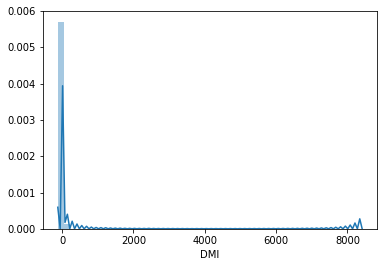

In [22]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    3733.000000
mean       10.446880
std         2.396261
min         4.357510
25%         9.017325
50%         9.770767
75%        11.611582
max        20.308800
Name: SAR, dtype: float64


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-02,8.78,8.74,8.75,8.76,2785057.0,0,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080,-0.092615,-0.680266,-4.748498e+09,-20.968902,8.8100
2019-09-03,8.79,8.75,8.75,8.77,2936767.0,0,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255,-0.027776,-1.460665,-4.748601e+09,-16.392404,8.7900
2019-09-04,8.85,8.76,8.77,8.85,3300443.0,0,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950,0.087080,-1.117312,-4.748637e+09,-3.640641,8.6700
2019-09-05,8.90,8.85,8.87,8.86,2553843.0,0,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876,0.176765,-0.449438,-4.748662e+09,5.776059,8.6700
2019-09-06,8.91,8.87,8.89,8.90,2939239.0,0,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835,0.267190,0.225220,-4.748661e+09,6.812410,8.6792


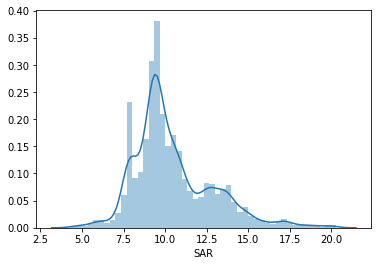

In [23]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [24]:
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #15個剛剛建立的技術指標
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(3453, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2019-09-02,30.856183,-72.727220,9.229268,8.810791,8.842000,8.751,8.734693,-66.301005,-38.888859,-0.007080,-0.092615,-0.680266,-4.748498e+09,-20.968902,8.8100,0
2019-09-03,33.111523,-68.749851,9.212683,8.802633,8.825556,8.754,8.745081,-58.212695,-31.428525,-0.001255,-0.027776,-1.460665,-4.748601e+09,-16.392404,8.7900,0
2019-09-04,48.590152,-43.749851,9.198049,8.812106,8.792889,8.767,8.792810,-32.397688,-27.777645,0.008950,0.087080,-1.117312,-4.748637e+09,-3.640641,8.6700,0
2019-09-05,50.250491,-40.625075,9.183171,8.821685,8.773778,8.791,8.829311,-2.993125,-6.666836,0.016876,0.176765,-0.449438,-4.748662e+09,5.776059,8.6700,0
2019-09-06,56.704535,-28.125075,9.169512,8.837348,8.761778,8.825,8.872194,29.699708,16.128814,0.024835,0.267190,0.225220,-4.748661e+09,6.812410,8.6792,0


# 相關性分析

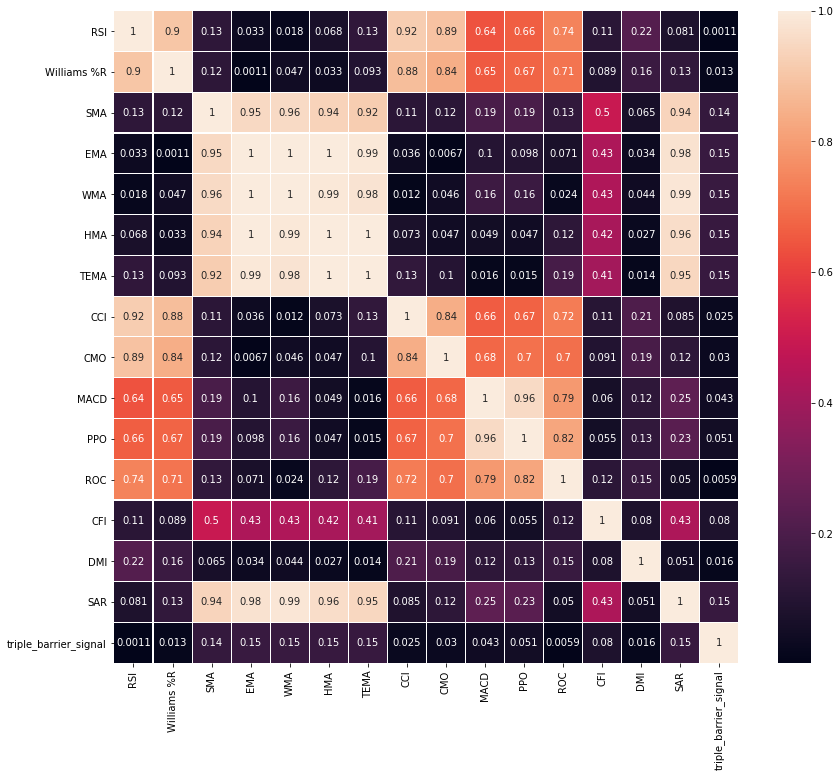

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,
                         index=df.index,
                         columns=df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
print(df_minmax.describe())
df_minmax.tail()

               RSI  Williams %R  ...          SAR  triple_barrier_signal
count  3453.000000  3453.000000  ...  3453.000000            3453.000000
mean      0.468181     0.487365  ...     0.389000              -0.258905
std       0.182639     0.305568  ...     0.149469               0.795508
min       0.000000     0.000000  ...     0.000000              -1.000000
25%       0.340572     0.210528  ...     0.300397              -1.000000
50%       0.467786     0.490595  ...     0.347764               0.000000
75%       0.585718     0.750025  ...     0.459918               0.000000
max       1.000000     1.000000  ...     1.000000               1.000000

[8 rows x 16 columns]


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2019-09-02,0.259479,0.272728,0.265079,0.256431,0.266093,0.271253,0.271943,0.353770,0.305556,0.565281,0.408336,0.434901,0.639143,0.010457,0.279130,0
2019-09-03,0.283633,0.312501,0.263789,0.255853,0.264959,0.271453,0.272617,0.368723,0.342857,0.572519,0.415624,0.426158,0.639136,0.010994,0.277877,0
2019-09-04,0.449407,0.562501,0.262652,0.256524,0.262706,0.272323,0.275711,0.416451,0.361112,0.585199,0.428534,0.430005,0.639133,0.012493,0.270354,0
2019-09-05,0.467189,0.593749,0.261496,0.257203,0.261388,0.273928,0.278078,0.470815,0.466666,0.595047,0.438614,0.437487,0.639132,0.013599,0.270354,0
2019-09-06,0.536311,0.718749,0.260434,0.258313,0.260561,0.276201,0.280858,0.531258,0.580644,0.604937,0.448778,0.445045,0.639132,0.013721,0.270930,0


In [27]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [28]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

for i in tqdm(range(b_index,f_index,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,
                 df.iloc[[i+days]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 3438/3438 [00:07<00:00, 478.22it/s]


準備完成


# check

In [29]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 3438
第一筆的index開始和結束:2000-04-28-2000-05-19
最後一筆的index開始和結束:2019-08-16-2019-09-06


# Reshape X

(圖片數量,長,寬,1張)

In [30]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(3438, 15, 15)
(3438, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [31]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(3438, 1)
[[-1]
 [-1]
 [-1]
 [-1]
 [ 1]]


Using TensorFlow backend.


(3438, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


# Visualization

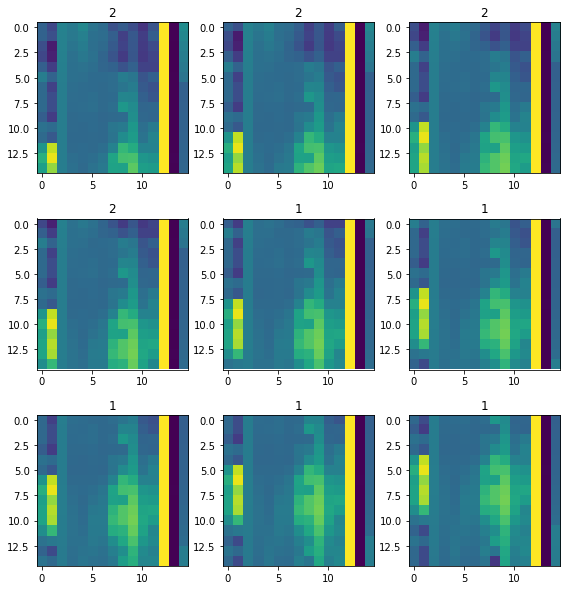

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and validation sets

In [33]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(3398, 15, 15, 1) (3398, 3) (40, 15, 15, 1)


In [34]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X_train,
                                              y_train, 
                                              test_size=0.2,
                                              random_state=42,
                                              shuffle=True,#是否洗牌
                                              stratify=None #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(2718, 15, 15, 1) (2718, 3) (680, 15, 15, 1) (680, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [35]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

2    1650
0    1036
1     752
dtype: int64

In [36]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    1330
0     808
1     580
dtype: int64

In [37]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

2    298
0    210
1    172
dtype: int64

# CNN

In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [39]:
model = Sequential()

nclasses = 3 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(nclasses, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    


In [40]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [0]:
#1
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc', 
                                 factor=0.5, 
                                 patience = 3, 
                                 verbose = 1, 
                                 min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_loss',#驗證集loss
                   min_delta=0, 
                   patience=20,  
                   mode='min',
                   restore_best_weights=False)#恢復最佳權重

# fit

In [42]:
history = model.fit(xtrain,ytrain,
                    batch_size=128,
                    epochs=200,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2718 samples, validate on 680 samples
Epoch 1/200
2718/2718 [==============================] - 3s 1ms/step - loss: 1.0287 - acc: 0.4838 - val_loss: 1.0277 - val_acc: 0.4382
Epoch 2/200
2718/2718 [==============================] - 0s 57us/step - loss: 0.9923 - acc: 0.4845 - val_loss: 1.0367 - val_acc: 0.4382
Epoch 3/200
2718/2718 [==============================] - 0s 54us/step - loss: 0.9755 - acc: 0.5033 - val_loss: 0.9704 - val_acc: 0.4985
Epoch 4/200
2718/2718 [==============================] - 0s 50us/step - loss: 0.9580 - acc: 0.5269 - val_loss: 0.9623 - val_acc: 0.5471
Epoch 5/200
2718/2718 [==============================] - 0s 51us/step - loss: 0.9520 - acc: 0.5202 - val_loss: 0.9529 - val_acc: 0.5529
Epoch 6/200
2718/2718 [==============================] - 0s 50us/step - loss: 0.9430 - acc: 0.5357 - val_loss: 0.9632 - val_acc: 0.5397
Epoch 7/200
2718/2718 [=====================

# 訓練過程評估

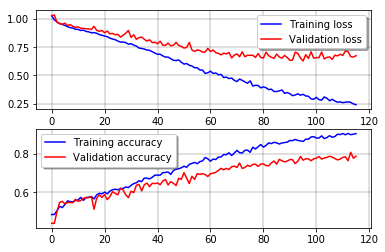

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

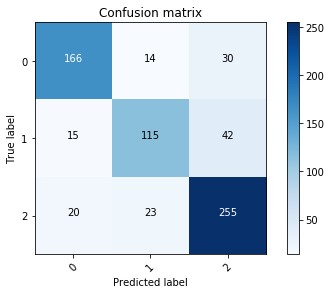

In [44]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [45]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


真實y值

In [46]:
print(yval[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 分類報告

In [47]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.83      0.79      0.81       210
         BUY       0.76      0.67      0.71       172
        SELL       0.78      0.86      0.82       298

   micro avg       0.79      0.79      0.79       680
   macro avg       0.79      0.77      0.78       680
weighted avg       0.79      0.79      0.79       680
 samples avg       0.79      0.79      0.79       680



# plot error

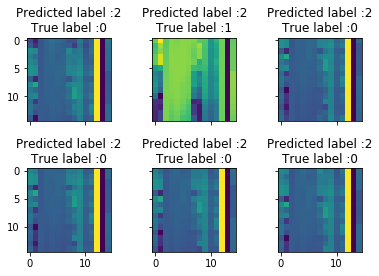

In [48]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [49]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

40


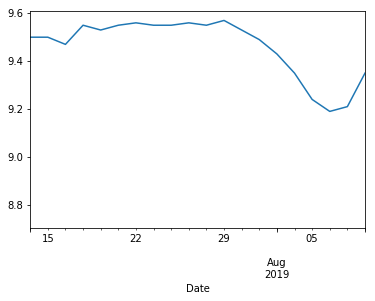

In [50]:
INDEX40 = df[-40:].index
C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = C.loc[INDEX40,:]
C['SIGNAL'] = answer
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][0:20].plot()
plt.scatter(buy.index,buy.values,color='red',marker="^")
plt.scatter(sell.index,sell.values,color='black')

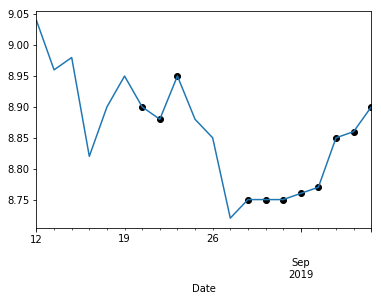

In [51]:
C['Close'][20:40].plot()
plt.scatter(buy.index,buy.values,color='red',marker="^")
plt.scatter(sell.index,sell.values,color='black')